In [157]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Lets import the dataset and save it as a dataframe.

In [158]:
cancer_df = pd.read_csv("data.csv")

In [159]:
print(cancer_df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

#As you see the features in the column section. So, we will take a transpose to understand the features of the dataset better.

In [160]:
print(cancer_df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

#Now, we start with the cleaning of the data. we will remove the columns that we don't need and are redundant.

In [161]:
cancer_df = cancer_df.drop(columns='id', axis =1)

In [162]:
cancer_df = cancer_df.drop(columns='Unnamed: 32', axis =1)

In [163]:
print(cancer_df.isnull().sum())
#So, we don't have null data

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


#Let's check the dataset after removing the columns

In [164]:
cancer_df.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


#Number of malignant and benign cases.

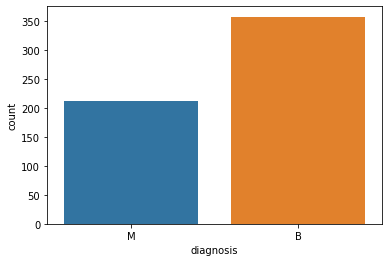

In [165]:
sns.countplot(x='diagnosis', data=cancer_df)

In [166]:
cancer_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# Now, as you can see from the dataset we have binary classification for the diagnosis of cancer (Malignant or benign). We can map those to keep M as 1 and B as 0 and change the dtype to int from an object type for ease.

In [167]:
cancer_df['diagnosis'] = cancer_df['diagnosis'].map({'M' : 1, 'B' : 0})

In [169]:
Y = cancer_df["diagnosis"].values

In [170]:
cancer_df.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


# In this dataset we are looking at different features of the nucleus of the cell. As a cell become more and more cancerous the morphology of the cell changes. That's what this featurelist represents.

In [171]:
cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#We will turn mean into a feature list.

In [172]:
cancer_df.columns[1:11]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [173]:
mean_features = list(cancer_df.columns[1:11])

# We will do the same process for the se and the worst features in a cell.

In [174]:
se_features = list(cancer_df.columns[11:21])
worst_features = list(cancer_df.columns[21:31])

# We can double check the features selected are in the correct list.

In [175]:
print(se_features)

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']


# Now, we can see which features that are correlated to the diagnosis by using the corr function. 

In [176]:
mean_features.append('diagnosis')
se_features.append('diagnosis')
worst_features.append('diagnosis')

In [177]:
print(se_features)

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'diagnosis']


In [178]:
corr = cancer_df[mean_features].corr()

#Let's see the correlation matrix

In [179]:
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [180]:
corr = cancer_df[se_features].corr()

In [181]:
corr

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [182]:
corr = cancer_df[worst_features].corr()

In [183]:
corr

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


# Lets save the variables that are impacting the diagnosis in different feature list. You can select your own parameters after looking at the correlation. I selected these 12 as my feature set.

In [184]:
corrpred_vars = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

#Split the data into train and test data

In [185]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cancer_df, test_size=0.2, random_state=1)

In [186]:
train_x = train[corrpred_vars]
train_y = train['diagnosis']
test_x = test[corrpred_vars]
test_y = test['diagnosis']

In [187]:
train_x

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,radius_worst,perimeter_worst,area_worst,concave points_worst
408,17.99,117.80,991.7,0.13040,0.120100,0.088240,0.4537,3.061,21.080,138.10,1349.0,0.19740
4,20.29,135.10,1297.0,0.13280,0.198000,0.104300,0.7572,5.438,22.540,152.20,1575.0,0.16250
307,9.00,56.36,246.3,0.03116,0.003681,0.003472,0.1746,1.144,9.699,60.90,285.5,0.01389
386,12.21,78.78,462.0,0.07823,0.068390,0.025340,0.2666,2.097,13.130,87.65,529.9,0.09140
404,12.34,78.29,469.1,0.04571,0.021090,0.020540,0.3833,2.602,13.180,84.11,533.1,0.04793
...,...,...,...,...,...,...,...,...,...,...,...,...
129,19.79,130.40,1192.0,0.15890,0.254500,0.114900,0.4953,2.765,22.630,148.70,1589.0,0.17320
144,10.75,68.26,355.3,0.05139,0.022510,0.007875,0.2525,1.806,11.950,77.79,441.2,0.03413
72,17.20,114.20,929.4,0.18300,0.169200,0.079440,0.5907,3.705,23.320,151.60,1681.0,0.18990
235,14.03,89.79,603.4,0.06945,0.014620,0.018960,0.2589,1.667,15.330,98.27,715.5,0.07963


In [188]:
test_x

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,radius_worst,perimeter_worst,area_worst,concave points_worst
421,14.690,98.22,656.1,0.18360,0.14500,0.063000,0.5462,4.795,16.46,114.10,809.2,0.11080
47,13.170,85.98,534.6,0.12310,0.12260,0.073400,0.2871,1.897,15.67,102.80,759.4,0.20880
292,12.950,83.14,513.7,0.07943,0.06155,0.033700,0.2094,1.231,13.74,88.81,585.4,0.10560
186,18.310,118.60,1041.0,0.08468,0.08169,0.058140,0.2577,1.817,21.31,139.20,1410.0,0.15710
414,15.130,96.71,719.5,0.04605,0.04686,0.027390,0.4681,3.043,17.26,110.10,931.4,0.06575
...,...,...,...,...,...,...,...,...,...,...,...,...
172,15.460,102.50,736.9,0.15550,0.20320,0.109700,0.4209,2.805,18.79,125.00,1102.0,0.18270
3,11.420,77.58,386.1,0.28390,0.24140,0.105200,0.4956,3.445,14.91,98.87,567.7,0.25750
68,9.029,58.79,250.5,0.14130,0.31300,0.043750,0.3274,1.885,10.31,65.50,324.7,0.17500
448,14.530,94.25,659.7,0.07800,0.08817,0.029250,0.2535,1.994,16.30,108.10,830.5,0.09594


# We can use different classifiers as a model as given in the next cell. 

In [214]:
from sklearn.neural_network import MLPClassifier                    
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix

In [ ]:
#We will use the sequential from keras to make it a sequence as described in the next cell starting from the input.

In [211]:
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              #loss='mean_squared_error',                                         # We can try with different loss parameters to see the difference
              metrics=['accuracy'])

In [212]:
history = model.fit(train_x, train_y, verbose=1, epochs=100, batch_size=32,
                    validation_data=(test_x, test_y))

Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 69.0275 - accuracy: 0.3714 - val_loss: 17.5147 - val_accuracy: 0.2105
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 56.9955 - accuracy: 0.3714 - val_loss: 15.4133 - val_accuracy: 0.1667
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 61.8296 - accuracy: 0.3516 - val_loss: 13.5898 - val_accuracy: 0.1404
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 56.9359 - accuracy: 0.3538 - val_loss: 14.0335 - val_accuracy: 0.3070
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 51.2561 - accuracy: 0.3560 - val_loss: 11.0427 - val_accuracy: 0.2018
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 38.3174 - accuracy: 0.3736 - val_loss: 9.4600 - val_accuracy: 0.2193
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 36.9119 - accuracy: 0.3868 - val_loss: 7.1817 - val_accuracy: 0.1579


#Plotting the training and validation loss and accuracy with each epoch.

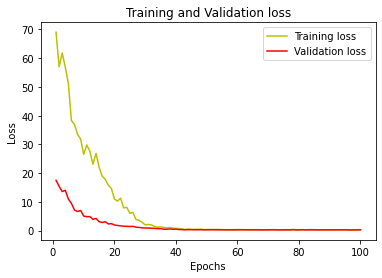

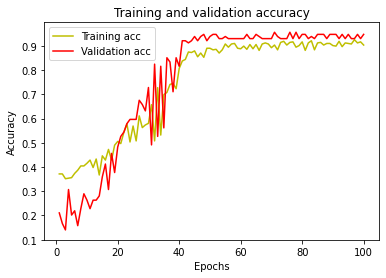

In [213]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range (1, len (loss) + 1)
plt.plot(epochs, loss, 'y', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']  
val_acc = history.history['val_accuracy'] 
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Build a confudion matrix to understand the model.

4/4 [==============================] - 0s 4ms/step


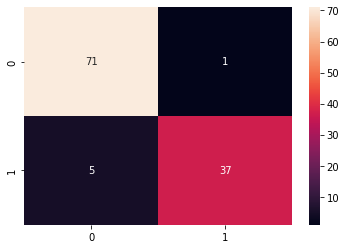

In [215]:
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)

Conmat = confusion_matrix(test_y, y_pred)

sns.heatmap(Conmat, annot=True)

#The diagonal represents the correct prediction and the other label represents the false prediction.